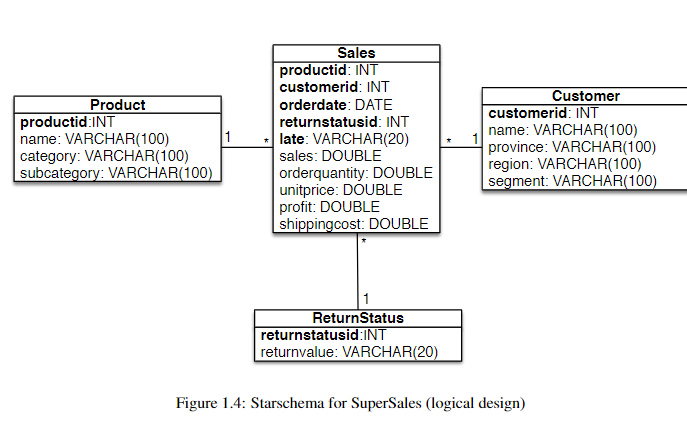

### Step 1: Business questions (given)
For this new warehouse in Canada, Mr. Bezos wants to know answers for the following questions
- Which products/product categories made the most loss?
- Which products/product categories were shipped really late (more than 2 days)?
- Which products/product categories were returned the most?



In [4]:
import zipfile

# zip_file_path = "./SuperSales.zip"
# extract_to = "./"
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("Unzipping complete!")

In [4]:
import os
import pandas as pd

for file in os.listdir('./SuperSales'):
    print(file)
    
main = pd.read_csv('./SuperSales/SuperstoreSales_main.csv',sep=';',encoding="ISO-8859-1")
manager = pd.read_csv('./SuperSales/SuperstoreSales_manager.csv',sep=';',encoding="ISO-8859-1")
returns = pd.read_csv('./SuperSales/SuperstoreSales_returns.csv',sep=';',encoding="ISO-8859-1")

SuperstoreSales_main.csv
SuperstoreSales_manager.csv
SuperstoreSales_returns.csv


In [ ]:
print("main:",main.columns)
print("manager:",manager.columns)
print("ret:",returns.columns)

main: Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')
man: Index(['Region', 'Manager'], dtype='object')
ret: Index(['Order ID', 'Status'], dtype='object')


In [44]:
# top 5 loss
## Profit = Sales - (Cost + Discounts + Shipping, etc.)
main_returned = pd.merge(returns,main,how='left',on='Order ID')

### replacing to float
main_returned['Profit'] = main_returned.Profit.astype(str).str.replace(',','.').astype(float)
top5_loss_products = main_returned.groupby('Product Name')['Profit'].sum().sort_values(ascending=True)[0:5]
top5_loss_products_cat = main_returned.groupby('Product Category')['Profit'].sum().sort_values(ascending=True)[0:5]
print(f"""Top 5 Products that made the most loss: \n {top5_loss_products},
      \n ----------------------------- \n 
      Top 5 Products Categories that made the most loss: \n {top5_loss_products_cat}""")

Top 5 Products that made the most loss: 
 Product Name
Polycom ViewStationª ISDN Videoconferencing Unit                -11984.40
Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish   -11053.60
Polycom ViewStationª Adapter H323 Videoconferencing Unit         -4858.67
Hon iLevelª Computer Training Table                              -4283.90
Bush Mission Pointe Library                                      -3837.46
Name: Profit, dtype: float64,
      
 ----------------------------- 
 
      Top 5 Products Categories that made the most loss: 
 Product Category
Furniture           -3487.53
Office Supplies    100921.47
Technology         100998.96
Name: Profit, dtype: float64


In [60]:
main['Order Date'] = pd.to_datetime(main['Order Date'],format='%d/%m/%Y')
main['Ship Date'] = pd.to_datetime(main['Ship Date'],format='%d/%m/%Y')
main['Delivery Days'] = (main['Ship Date'] -main['Order Date']).dt.days 


In [ ]:
# Filter only late shipments (Delivery Days > 2)
late_shipments = main[main['Delivery Days'] > 2]
# Count occurrences of late shipments per product
top5_late_products = late_shipments.groupby('Product Name').size().sort_values(ascending=False).head(5)
# Count occurrences of late shipments per product category
top5_late_products_cat = late_shipments.groupby('Product Category').size().sort_values(ascending=False).head(5)
print(f"""Top 5 Products that were shipped really late (more than 2 days): \n {top5_late_products},
      \n ----------------------------- \n 
      Top 5 Product Categories that were shipped really late (more than 2 days): \n {top5_late_products_cat}""")


Top 5 Products that were shipped really late (more than 2 days): 
 Product Name
Bell Sonecor JB700 Caller ID                                         11
Xerox 210                                                            10
Snap-A-Way¨ Black Print Carbonless Ruled Speed Letter, Triplicate    10
Fellowes Super Stor/Drawer¨ Files                                    10
Global High-Back Leather Tilter, Burgundy                             9
dtype: int64,
      
 ----------------------------- 
 
      Top 5 Product Categories that were shipped really late (more than 2 days): 
 Product Category
Office Supplies    1752
Technology          803
Furniture           668
dtype: int64


In [49]:
top5_returned_products = main_returned.groupby('Product Name').size().sort_values(ascending=False).head(5)
top5_returned_products_cat = main_returned.groupby('Product Category').size().sort_values(ascending=False).head(5)
print(f"""Top 5 Products that were most returned: \n {top5_returned_products},
      \n ----------------------------- \n 
      Top 5 Products Categories that were most returned: \n {top5_returned_products_cat}""")


Top 5 Products that were most returned: 
 Product Name
O'Sullivan Elevations Bookcase, Cherry Finish      5
Bush Mission Pointe Library                        5
Imation Neon Mac Format Diskettes, 10/Pack         5
Coloredge Poster Frame                             5
Riverside Furniture Stanwyck Manor Table Series    5
dtype: int64,
      
 ----------------------------- 
 
      Top 5 Products Categories that were most returned: 
 Product Category
Office Supplies    461
Technology         218
Furniture          193
dtype: int64


### Step 2: Multidimensional model (given)

### Step 3: Data exploration

### Step 4: ETL — Prepare data and fill the database

### Step 4: Visualization